In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.utils import shuffle


plt.style.use('ggplot')
import librosa
from librosa import feature
from librosa import display
genres = [
    'blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop',
    'reggae', 'rock'
]

In [2]:
dfFeatures = pd.read_csv("music_features.csv")

dfFeatures = shuffle(dfFeatures)
dfFeatures2 = dfFeatures.drop(columns = ['filename', 'genre'])

genreList = dfFeatures['genre']
genreList

146    classical
645        metal
271      country
547         jazz
937         rock
         ...    
206      country
602        metal
518         jazz
297      country
369        disco
Name: genre, Length: 1000, dtype: object

In [3]:
X = dfFeatures2.to_numpy()


encoder = LabelEncoder()
y = encoder.fit_transform(genreList)


X_train, X_test, y_train, y_test = train_test_split(dfFeatures2, y, test_size=0.2)


In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(26,)))

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [6]:
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=128)

Epoch 1/200
7/7 [==============================] - 0s 2ms/step - loss: 289.7128 - accuracy: 0.1127
Epoch 2/200
7/7 [==============================] - 0s 1ms/step - loss: 118.5934 - accuracy: 0.1040
Epoch 3/200
7/7 [==============================] - 0s 2ms/step - loss: 60.8079 - accuracy: 0.1537
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 35.9622 - accuracy: 0.1353
Epoch 5/200
7/7 [==============================] - 0s 2ms/step - loss: 28.0249 - accuracy: 0.1217
Epoch 6/200
7/7 [==============================] - 0s 2ms/step - loss: 21.2062 - accuracy: 0.1651
Epoch 7/200
7/7 [==============================] - 0s 3ms/step - loss: 16.7206 - accuracy: 0.1985
Epoch 8/200
7/7 [==============================] - 0s 2ms/step - loss: 13.4551 - accuracy: 0.1795
Epoch 9/200
7/7 [==============================] - 0s 1ms/step - loss: 10.8933 - accuracy: 0.2297
Epoch 10/200
7/7 [==============================] - 0s 1ms/step - loss: 10.1692 - accuracy: 0.2399
Epoch 11/200
7/7 

7/7 [==============================] - 0s 1ms/step - loss: 5.8343 - accuracy: 0.2945
Epoch 84/200
7/7 [==============================] - 0s 1ms/step - loss: 4.8282 - accuracy: 0.3211
Epoch 85/200
7/7 [==============================] - 0s 833us/step - loss: 4.8071 - accuracy: 0.3285
Epoch 86/200
7/7 [==============================] - 0s 1ms/step - loss: 5.3202 - accuracy: 0.3057
Epoch 87/200
7/7 [==============================] - 0s 2ms/step - loss: 8.6533 - accuracy: 0.2993
Epoch 88/200
7/7 [==============================] - ETA: 0s - loss: 5.8860 - accuracy: 0.35 - 0s 1000us/step - loss: 5.7343 - accuracy: 0.3476
Epoch 89/200
7/7 [==============================] - 0s 833us/step - loss: 3.9601 - accuracy: 0.3530
Epoch 90/200
7/7 [==============================] - 0s 2ms/step - loss: 2.9942 - accuracy: 0.3821
Epoch 91/200
7/7 [==============================] - 0s 1ms/step - loss: 3.9118 - accuracy: 0.3394
Epoch 92/200
7/7 [==============================] - 0s 833us/step - loss: 3.7464 -

7/7 [==============================] - 0s 2ms/step - loss: 2.7810 - accuracy: 0.4516
Epoch 165/200
7/7 [==============================] - 0s 2ms/step - loss: 2.5539 - accuracy: 0.4368
Epoch 166/200
7/7 [==============================] - 0s 1ms/step - loss: 2.6821 - accuracy: 0.4209
Epoch 167/200
7/7 [==============================] - 0s 1ms/step - loss: 2.2376 - accuracy: 0.4389
Epoch 168/200
7/7 [==============================] - 0s 2ms/step - loss: 1.9534 - accuracy: 0.4725
Epoch 169/200
7/7 [==============================] - 0s 2ms/step - loss: 2.3549 - accuracy: 0.4367
Epoch 170/200
7/7 [==============================] - 0s 998us/step - loss: 2.0608 - accuracy: 0.4578
Epoch 171/200
7/7 [==============================] - 0s 833us/step - loss: 3.0814 - accuracy: 0.4564
Epoch 172/200
7/7 [==============================] - 0s 1ms/step - loss: 2.0845 - accuracy: 0.4391
Epoch 173/200
7/7 [==============================] - 0s 1ms/step - loss: 2.4538 - accuracy: 0.4750
Epoch 174/200
7/7 [=

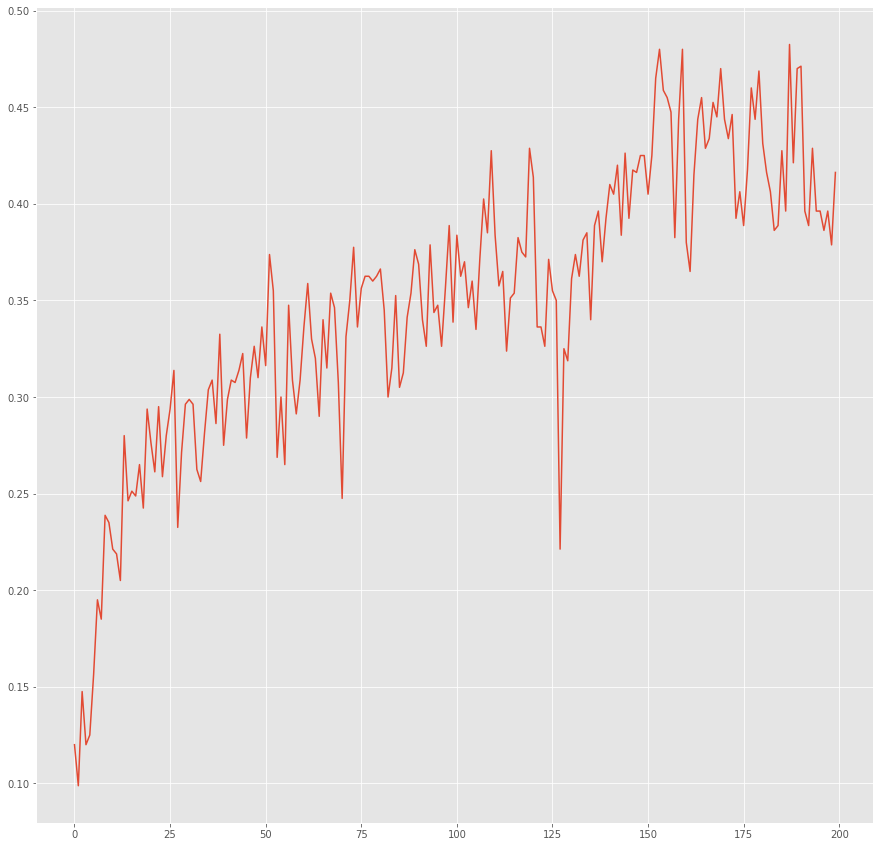

In [7]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

ax.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])



In [8]:
test_loss, test_acc = model.evaluate(X_test,y_test)
test_acc

7/7 [==============================] - 0s 833us/step - loss: 2.7104 - accuracy: 0.4600


0.46000000834465027